<a href="https://colab.research.google.com/github/emmanuellaanggi/using-shap-model-explainability/blob/master/CovidImageDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###### **An attempt to use SHAP on this COVID-19 X-Ray Lungs data that's trained with Conv but itssss hard... gonna upload it first and fix it next time**

big thanks to https://www.kaggle.com/dimitreoliveira/diabetic-retinopathy-shap-model-explainability

# **Download Data from kaggle**
dont forget to add the kaggle API to the environtment

In [ ]:
!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d pranavraikokte/covid19-image-dataset

 94% 148M/158M [00:03<00:00, 44.1MB/s]
100% 158M/158M [00:03<00:00, 51.3MB/s]


In [ ]:
import zipfile
path_to_zip_file = 'covid19-image-dataset.zip'
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall()

# **PREPARING DATA**

In [ ]:
!pip install classification_models

  Created wheel for classification-models: filename=classification_models-0.1-cp36-none-any.whl size=4755 sha256=890c9d0d5475e78495b3e429f25acc013f9f2712b77fd5d05c08b97e3f1ea2cb
  Stored in directory: /root/.cache/pip/wheels/50/b5/89/45f4964eec60d855f1ac0d91cefcbf76f0d6547f0acf8c4fe4
Successfully built classification-models


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 

import cv2

import os

import numpy as np
import pandas as pd
import os
import cv2
import PIL
import gc
import psutil
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow
from tqdm import tqdm
from math import ceil
import math
import sys
import gc

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import array_to_img
from keras.preprocessing.image import img_to_array
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.models import Model
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.pooling import GlobalAveragePooling2D
from keras.layers import Input
from keras.layers.core import Dropout
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping

from keras.activations import softmax
from keras.activations import elu
from keras.activations import relu
from keras.optimizers import Adam
from keras.optimizers import RMSprop
from keras.optimizers import SGD
from keras.layers.normalization import BatchNormalization
from tqdm import tqdm

gc.enable()

#print(os.listdir("../input/"))

In [ ]:
import csv

f=open("training_data.csv",'w')

w=csv.writer(f) 
w.writerow(['file_name', 'diagnosis'])

for path, dirs, files in os.walk("/content/Covid19-dataset/train/ViralPneumonia"):
  for filename in files:
    w.writerow(["/content/Covid19-dataset/train/ViralPneumonia/"+filename, "2"])

In [ ]:
for path, dirs, files in os.walk("/content/Covid19-dataset/train/Covid"):
  for filename in files:
    w.writerow(["/content/Covid19-dataset/train/Covid/"+filename, "1"])

In [ ]:
for path, dirs, files in os.walk("/content/Covid19-dataset/train/Normal"):
  for filename in files:
    w.writerow(["/content/Covid19-dataset/train/Normal/"+filename, "0"])

In [ ]:
predata_train.drop_duplicates(subset ="file_name", 
                     keep = False, inplace = True)

In [ ]:
predata_train = pd.read_csv("training_data.csv", dtype=str)
predata_train.count()

file_name    321
diagnosis    321
dtype: int64

In [ ]:
SEED = 7
np.random.seed(SEED)
tensorflow.random.set_seed(SEED)
dir_path = "."
IMG_DIM = 224  # 224 399 #
BATCH_SIZE = 12
CHANNEL_SIZE = 3
NUM_EPOCHS = 60
TRAIN_DIR = 'train'
TEST_DIR = 'test'
FREEZE_LAYERS = 2  # freeze the first this many layers for training
CLASSS = {0: "Normal", 1: "COVID-19", 2: "Viral Pnemonia"}

In [ ]:
df_train = predata_train

NUM_CLASSES = df_train['diagnosis'].nunique()
NUM_CLASSES

3

In [ ]:
print("Training set has {} samples and {} classes.".format(df_train.shape[0], df_train.shape[1]+1))

Training set has 321 samples and 3 classes.


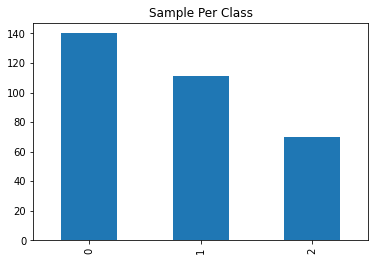

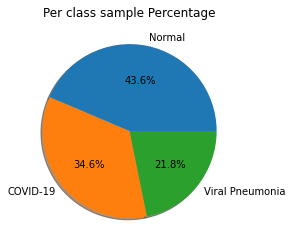

In [ ]:
chat_data = df_train.diagnosis.value_counts()
chat_data.plot(kind='bar');
plt.title('Sample Per Class');
plt.show()
plt.pie(chat_data, autopct='%1.1f%%', shadow=True, labels=["Normal", "COVID-19", "Viral Pneumonia"])
plt.title('Per class sample Percentage');
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_train.file_name, df_train.diagnosis, test_size=0.1,
                                                    random_state=SEED, stratify=df_train.diagnosis)

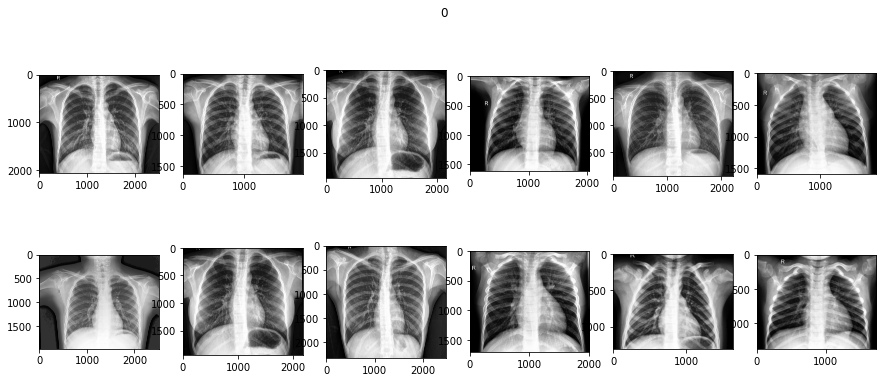

In [ ]:
def draw_img(imgs, class_label):
    fig, axis = plt.subplots(2, 6, figsize=(15, 6))
    for idnx, (idx, row) in enumerate(imgs.iterrows()):
        imgPath = os.path.join(dir_path, f"{row['file_name']}")
        img = cv2.imread(imgPath)
        row = idnx // 6
        col = idnx % 6
        axis[row, col].imshow(img)
    plt.suptitle(class_label)
    plt.show
    
CLASS_ID = "0"
draw_img(df_train[df_train.diagnosis == CLASS_ID].head(12), CLASS_ID)

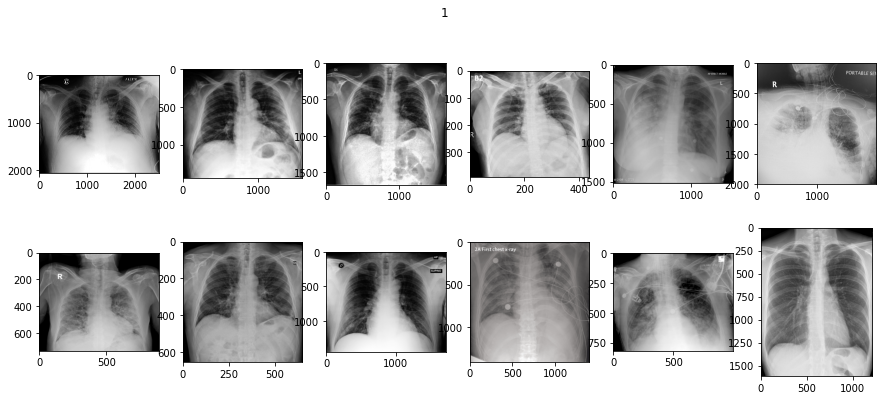

In [ ]:
CLASS_ID = "1"
draw_img(df_train[df_train.diagnosis == f"{CLASS_ID}"].head(12), CLASS_ID)

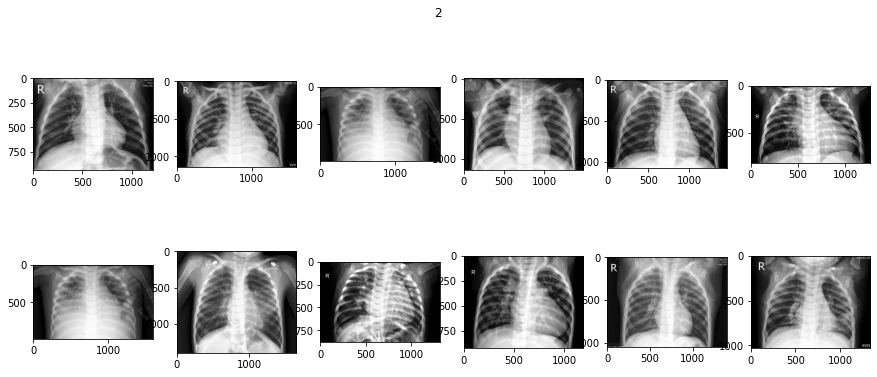

In [ ]:
CLASS_ID = "2"
draw_img(df_train[df_train.diagnosis == CLASS_ID].head(12), CLASS_ID)

In [ ]:
def check_max_min_img_height_width(df):
    max_Height , max_Width =0 ,0
    min_Height , min_Width =sys.maxsize ,sys.maxsize 
    for idx, row in df.iterrows():
        imgPath=os.path.join(dir_path,f"{row['file_name']}") 
        img=cv2.imread(imgPath)
        H,W=img.shape[:2]
        max_Height=max(H,max_Height)
        max_Width =max(W,max_Width)
        min_Height=min(H,min_Height)
        min_Width =min(W,min_Width)
    return max_Height, max_Width, min_Height, min_Width

In [ ]:
check_max_min_img_height_width(df_train)

(4095, 4248, 391, 439)

In [ ]:
IMG_DIM, IMG_DIN = 391, 439

In [ ]:
from sklearn.utils import shuffle 
df_train = shuffle(df_train)

# **TRAINING**

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [ ]:
train_generator = train_datagen.flow_from_dataframe(dataframe=df_train,
                                                    directory=".",
                                                    x_col="file_name",
                                                    y_col="diagnosis",
                                                    batch_size=BATCH_SIZE,
                                                    class_mode="categorical",
                                                    target_size=(IMG_DIM, IMG_DIN),
                                                    subset='training',
                                                    shaffle=True,
                                                    seed=SEED,
                                                    )
valid_generator = train_datagen.flow_from_dataframe(dataframe=df_train,
                                                    directory=".",
                                                    x_col="file_name",
                                                    y_col="diagnosis",
                                                    batch_size=BATCH_SIZE,
                                                    class_mode="categorical",
                                                    target_size=(IMG_DIM, IMG_DIN),
                                                    subset='validation',
                                                    shaffle=True,
                                                    seed=SEED
                                                    )

gc.collect()

Found 257 validated image filenames belonging to 3 classes.
Found 64 validated image filenames belonging to 3 classes.


45077

In [ ]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(2, 2), input_shape=(IMG_DIM, IMG_DIN, CHANNEL_SIZE), activation=relu))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(2, 2), activation=relu))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(2, 2), activation=relu))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(GlobalAveragePooling2D())
model.add(Dense(units=1000, activation=relu))
model.add(Dropout(rate=0.2))
model.add(Dense(units=1000, activation=relu))
model.add(Dropout(rate=0.2))
model.add(Dense(NUM_CLASSES, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 390, 438, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 195, 219, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 194, 218, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 97, 109, 32)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 108, 64)       8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 54, 64)        0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 64)                0

In [ ]:
model.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss',patience=2)
# Reducing the Learning Rate if result is not improving. 
reduce_lr = ReduceLROnPlateau(monitor='val_loss', min_delta=0.0004, patience=2, factor=0.1, min_lr=1e-6, mode='auto',
                              verbose=1)

NUB_TRAIN_STEPS = train_generator.n // train_generator.batch_size
NUB_VALID_STEPS = valid_generator.n // valid_generator.batch_size

NUB_TRAIN_STEPS, NUB_VALID_STEPS

(21, 5)

In [ ]:
history = model.fit_generator(generator=train_generator, steps_per_epoch=NUB_TRAIN_STEPS,
                              validation_data=valid_generator, validation_steps=NUB_VALID_STEPS,
                              epochs=30, verbose=1, callbacks=early_stop)

Epoch 1/30
21/21 [==============================] - 36s 2s/step - loss: 1.0811 - accuracy: 0.4286 - val_loss: 1.0128 - val_accuracy: 0.5500
Epoch 2/30
21/21 [==============================] - 35s 2s/step - loss: 1.0787 - accuracy: 0.4204 - val_loss: 1.0598 - val_accuracy: 0.2333
Epoch 3/30
21/21 [==============================] - 36s 2s/step - loss: 1.0421 - accuracy: 0.4722 - val_loss: 1.0114 - val_accuracy: 0.5333
Epoch 4/30
21/21 [==============================] - 36s 2s/step - loss: 1.0169 - accuracy: 0.4722 - val_loss: 0.9514 - val_accuracy: 0.5333
Epoch 5/30
21/21 [==============================] - 35s 2s/step - loss: 0.9773 - accuracy: 0.5184 - val_loss: 0.9742 - val_accuracy: 0.6000
Epoch 6/30
21/21 [==============================] - 35s 2s/step - loss: 0.9516 - accuracy: 0.5429 - val_loss: 0.8819 - val_accuracy: 0.6333
Epoch 7/30
21/21 [==============================] - 35s 2s/step - loss: 0.9184 - accuracy: 0.5755 - val_loss: 0.9186 - val_accuracy: 0.4833
Epoch 8/30
21/21 [==

In [ ]:
model.save('covid.h5')

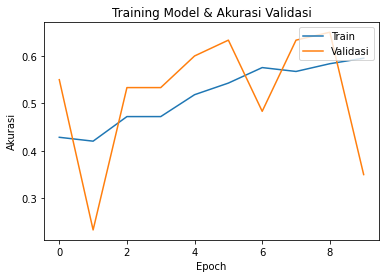

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Model & Akurasi Validasi')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validasi'], loc='upper right')
plt.show()

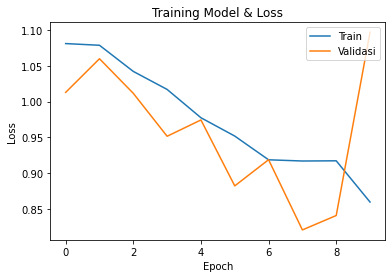

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Model & Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validasi'], loc='upper right')
plt.show()

In [ ]:
from keras import optimizers, applications
from sklearn.utils import class_weight

In [ ]:
from sklearn.utils import class_weight
WARMUP_LEARNING_RATE = 1e-3

odel = model

for layer in odel.layers:
    layer.trainable = False

for i in range(-5, 0):
    model.layers[i].trainable = True
    
class_weights = class_weight.compute_class_weight('balanced', np.unique(df_train['diagnosis'].astype('int').values), df_train['diagnosis'].astype('int').values)

metric_list = ["accuracy"]
optimizer = optimizers.Adam(lr=WARMUP_LEARNING_RATE)
model.compile(optimizer=optimizer, loss='categorical_crossentropy',  metrics=metric_list)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 390, 438, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 195, 219, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 194, 218, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 97, 109, 32)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 108, 64)       8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 54, 64)        0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 64)                0

In [ ]:
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size
WARMUP_EPOCHS = 2

history_warmup = odel.fit_generator(generator=train_generator,
                                     steps_per_epoch=STEP_SIZE_TRAIN,
                                     validation_data=valid_generator,
                                     validation_steps=STEP_SIZE_VALID,
                                     epochs=WARMUP_EPOCHS,
                                     verbose=1).history

Epoch 1/2
21/21 [==============================] - 26s 1s/step - loss: 0.8298 - accuracy: 0.6163 - val_loss: 0.8168 - val_accuracy: 0.6167
Epoch 2/2
21/21 [==============================] - 23s 1s/step - loss: 0.7788 - accuracy: 0.6245 - val_loss: 0.7988 - val_accuracy: 0.6333


In [ ]:
ES_PATIENCE = 2
RLROP_PATIENCE = 2
DECAY_DROP = 0.5
LEARNING_RATE = 1e-4

for layer in odel.layers:
    layer.trainable = True

es = EarlyStopping(monitor='val_loss', mode='min', patience=ES_PATIENCE, restore_best_weights=True, verbose=1)
rlrop = ReduceLROnPlateau(monitor='val_loss', mode='min', patience=RLROP_PATIENCE, factor=DECAY_DROP, min_lr=1e-6, verbose=1)

callback_list = [es, rlrop]
optimizer = optimizers.Adam(lr=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='categorical_crossentropy',  metrics=metric_list)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 390, 438, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 195, 219, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 194, 218, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 97, 109, 32)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 108, 64)       8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 54, 64)        0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 64)                0

In [ ]:
EPOCHS = 15

history_finetunning = odel.fit_generator(generator=train_generator,
                                          steps_per_epoch=STEP_SIZE_TRAIN,
                                          validation_data=valid_generator,
                                          validation_steps=STEP_SIZE_VALID,
                                          epochs=EPOCHS,
                                          callbacks=callback_list,
                                          verbose=1).history

Epoch 1/15
21/21 [==============================] - 35s 2s/step - loss: 0.7585 - accuracy: 0.6367 - val_loss: 0.7690 - val_accuracy: 0.6500
Epoch 2/15
21/21 [==============================] - 35s 2s/step - loss: 0.7426 - accuracy: 0.6490 - val_loss: 0.7681 - val_accuracy: 0.6333
Epoch 3/15
21/21 [==============================] - 35s 2s/step - loss: 0.7324 - accuracy: 0.6612 - val_loss: 0.7632 - val_accuracy: 0.6500
Epoch 4/15
21/21 [==============================] - 35s 2s/step - loss: 0.7096 - accuracy: 0.6694 - val_loss: 0.7247 - val_accuracy: 0.6833
Epoch 5/15
21/21 [==============================] - 35s 2s/step - loss: 0.7403 - accuracy: 0.6653 - val_loss: 0.7453 - val_accuracy: 0.6667
Epoch 6/15
21/21 [==============================] - ETA: 0s - loss: 0.7231 - accuracy: 0.6612Restoring model weights from the end of the best epoch.

Epoch 00006: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
21/21 [==============================] - 35s 2s/step - loss: 0.7231 - 

# **EVALUATION**

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


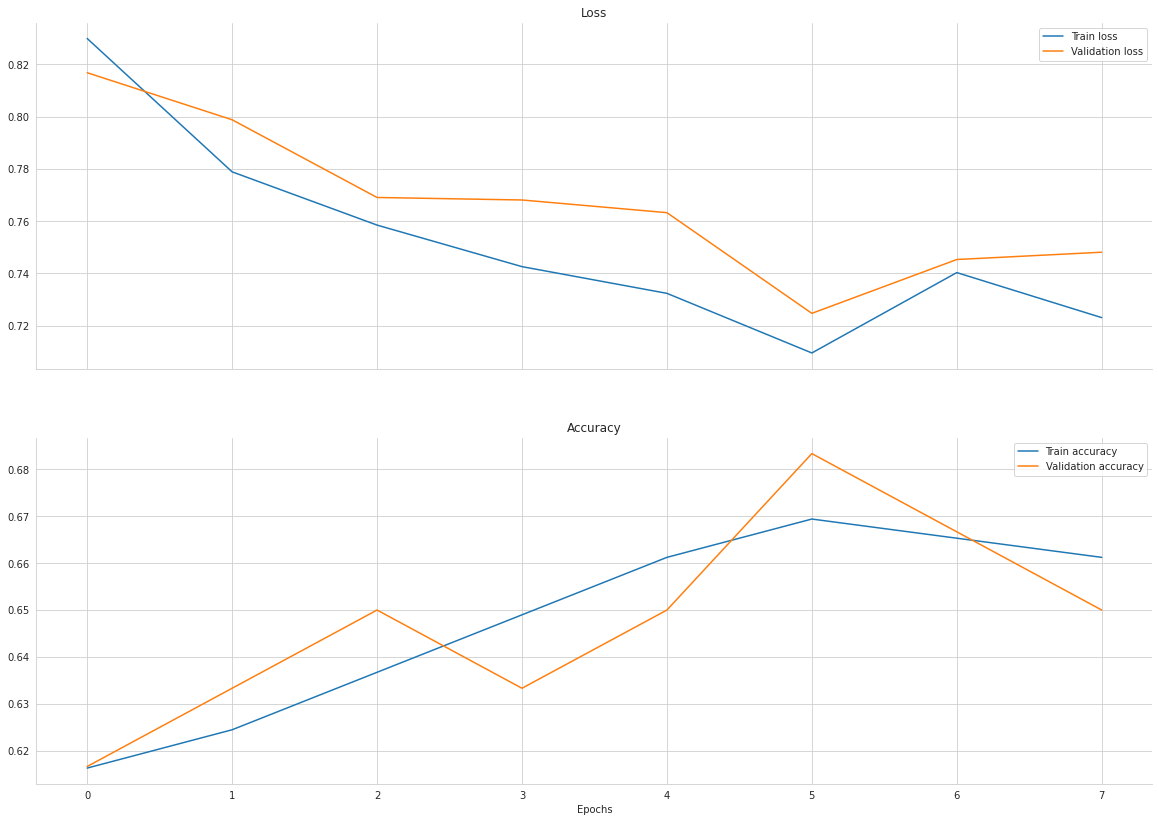

In [ ]:
history = {'loss': history_warmup['loss'] + history_finetunning['loss'], 
           'val_loss': history_warmup['val_loss'] + history_finetunning['val_loss'], 
           'acc': history_warmup['accuracy'] + history_finetunning['accuracy'], 
           'val_acc': history_warmup['val_accuracy'] + history_finetunning['val_accuracy']}

sns.set_style("whitegrid")
fig, (ax1, ax2) = plt.subplots(2, 1, sharex='col', figsize=(20, 14))

ax1.plot(history['loss'], label='Train loss')
ax1.plot(history['val_loss'], label='Validation loss')
ax1.legend(loc='best')
ax1.set_title('Loss')

ax2.plot(history['acc'], label='Train accuracy')
ax2.plot(history['val_acc'], label='Validation accuracy')
ax2.legend(loc='best')
ax2.set_title('Accuracy')

plt.xlabel('Epochs')
sns.despine()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, cohen_kappa_score

In [ ]:
N_CLASSES = df_train['diagnosis'].nunique()

# Create empty arays to keep the predictions and labels
lastFullTrainPred = np.empty((0, N_CLASSES))
lastFullTrainLabels = np.empty((0, N_CLASSES))
lastFullValPred = np.empty((0, N_CLASSES))
lastFullValLabels = np.empty((0, N_CLASSES))

# Add train predictions and labels
for i in range(STEP_SIZE_TRAIN+1):
    im, lbl = next(train_generator)
    scores = odel.predict(im, batch_size=train_generator.batch_size)
    lastFullTrainPred = np.append(lastFullTrainPred, scores, axis=0)
    lastFullTrainLabels = np.append(lastFullTrainLabels, lbl, axis=0)

# Add validation predictions and labels
for i in range(STEP_SIZE_VALID+1):
    im, lbl = next(valid_generator)
    scores = odel.predict(im, batch_size=valid_generator.batch_size)
    lastFullValPred = np.append(lastFullValPred, scores, axis=0)
    lastFullValLabels = np.append(lastFullValLabels, lbl, axis=0)
    
lastFullComPred = np.concatenate((lastFullTrainPred, lastFullValPred))
lastFullComLabels = np.concatenate((lastFullTrainLabels, lastFullValLabels))
complete_labels = [np.argmax(label) for label in lastFullComLabels]

train_preds = [np.argmax(pred) for pred in lastFullTrainPred]
train_labels = [np.argmax(label) for label in lastFullTrainLabels]
validation_preds = [np.argmax(pred) for pred in lastFullValPred]
validation_labels = [np.argmax(label) for label in lastFullValLabels]

In [ ]:
labels = ["0: Normal", "1: COVID-19", "2: Viral Pneumonia"]
train_cnf_matrix = confusion_matrix(train_labels, train_preds)
validation_cnf_matrix = confusion_matrix(validation_labels, validation_preds)

train_cnf_matrix_norm = train_cnf_matrix.astype('float') / train_cnf_matrix.sum(axis=1)[:, np.newaxis]
validation_cnf_matrix_norm = validation_cnf_matrix.astype('float') / validation_cnf_matrix.sum(axis=1)[:, np.newaxis]

train_df_cm = pd.DataFrame(train_cnf_matrix_norm, index=labels, columns=labels)
validation_df_cm = pd.DataFrame(validation_cnf_matrix_norm, index=labels, columns=labels)

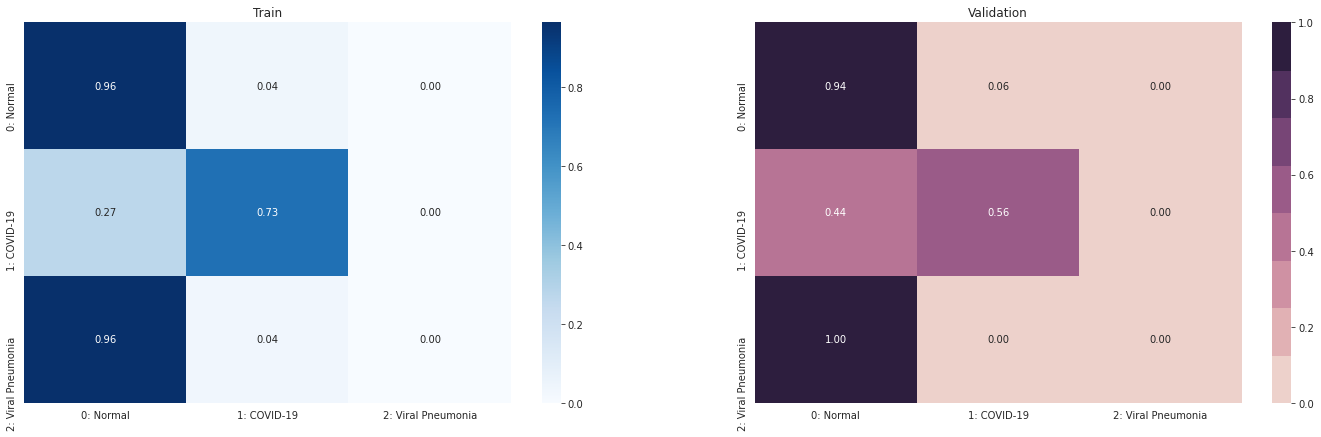

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex='col', figsize=(24, 7))
sns.heatmap(train_df_cm, annot=True, fmt='.2f', cmap="Blues", ax=ax1).set_title('Train')
sns.heatmap(validation_df_cm, annot=True, fmt='.2f', cmap=sns.cubehelix_palette(8), ax=ax2).set_title('Validation')
plt.show()

In [ ]:
print("Train Cohen Kappa score: %.3f" % cohen_kappa_score(train_preds,train_labels, weights='quadratic'))
print("Validation Cohen Kappa score: %.3f" % cohen_kappa_score(validation_preds, validation_labels, weights='quadratic'))
print("Complete set Cohen Kappa score: %.3f" % cohen_kappa_score(train_preds+validation_preds, train_labels+validation_labels, weights='quadratic'))

Train Cohen Kappa score: 0.087
Validation Cohen Kappa score: 0.055
Complete set Cohen Kappa score: 0.086


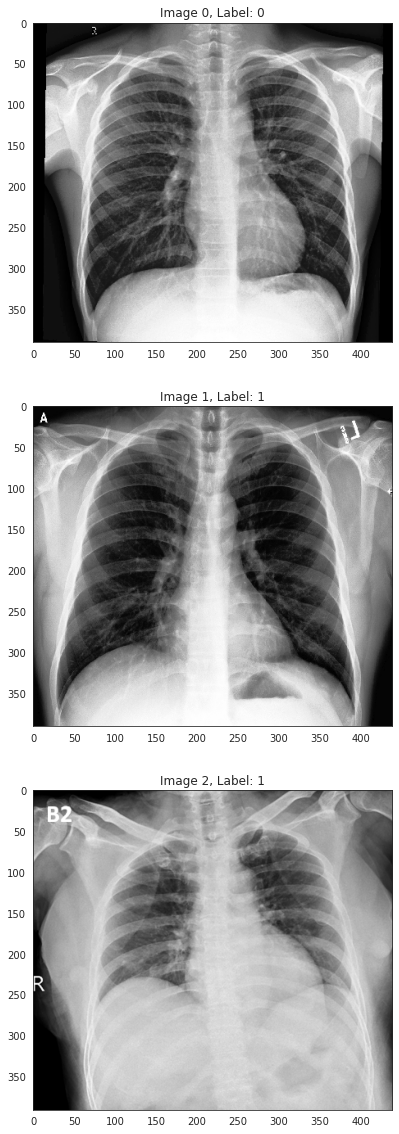

In [ ]:
n_explain = 3
valid_generator.batch_size = 10 # background dataset
background, lbls = next(valid_generator)

sns.set_style("white")
plt.figure(figsize=[20,20])
for index, image in enumerate(background[:n_explain]):
    plt.subplot(n_explain, 1, index+1)
    plt.imshow(image)
    plt.title("Image %s, Label: %s" % (index, np.argmax(lbls[index])))
    
plt.show()

# **USING SHAP**

In [ ]:
!pip install shap

In [ ]:
import shap

keras is no longer supported, please use tf.keras instead.


Instructions for updating:
Simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


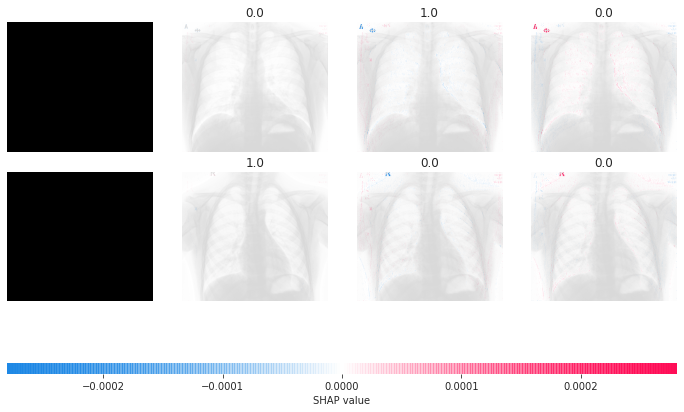

In [ ]:
# explain predictions of the model on "n_explain" images
e = shap.DeepExplainer(odel, background)
shap_values = e.shap_values(background)

# plot the feature attributions
shap.image_plot(shap_values, -background[:n_explain], labels=lbls, hspace=0.1)